In [1]:
import pandas as pd
import numpy as np


In [14]:
features=pd.read_csv('/content/clusters.csv')
features

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091
...,...,...,...
995,1.035455,1.916280,1.535641
996,3.479744,3.747277,3.038687
997,2.422571,1.771780,1.729732
998,-0.237440,-0.029278,0.077298


In [19]:
from sklearn.preprocessing import MinMaxScaler
features=MinMaxScaler().fit_transform(features)
features

array([[0.25405972, 0.3340625 , 0.29330502],
       [0.09393923, 0.1785612 , 0.3021151 ],
       [0.71521216, 0.59990379, 0.75838262],
       ...,
       [0.66241894, 0.56024627, 0.55320773],
       [0.22966477, 0.2637139 , 0.30285353],
       [0.65912144, 0.62517441, 0.63406712]])

In [20]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
feat_2d = pca.fit_transform(features)

In [47]:
feat_2d

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       ...,
       [-0.13072154,  0.0767816 ],
       [ 0.43722666, -0.02364599],
       [-0.21179279,  0.02825676]])

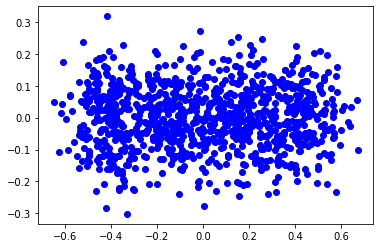

In [49]:
#unclustered data
for pt in feat_2d:
  plt.scatter(pt[0],pt[1],color='blue')

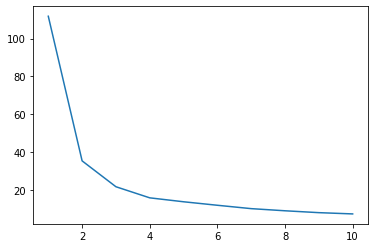

In [23]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i).fit(feat_2d)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [50]:
clusters=KMeans(n_clusters=4).fit_predict(feat_2d)
clusters

array([3, 3, 0, 0, 3, 3, 0, 2, 3, 3, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 3, 2,
       3, 3, 2, 1, 0, 3, 1, 2, 1, 3, 0, 2, 2, 3, 2, 2, 3, 1, 2, 2, 0, 1,
       0, 3, 3, 0, 0, 2, 3, 1, 0, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 2, 2,
       1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 2, 3, 1, 2, 1, 0, 1, 2, 0, 1, 2,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0,
       2, 1, 3, 3, 1, 0, 1, 0, 3, 1, 2, 1, 0, 0, 3, 2, 1, 2, 0, 3, 1, 1,
       1, 2, 1, 1, 2, 3, 2, 1, 3, 1, 1, 3, 0, 0, 2, 0, 2, 2, 0, 3, 3, 2,
       3, 1, 3, 2, 2, 2, 1, 3, 0, 0, 2, 1, 1, 3, 3, 0, 3, 1, 2, 0, 2, 1,
       1, 2, 2, 3, 2, 3, 2, 1, 2, 0, 3, 0, 0, 1, 1, 3, 1, 2, 0, 1, 2, 2,
       3, 0, 1, 0, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 1, 3, 0, 2, 2, 0, 3, 0,
       2, 3, 3, 0, 1, 2, 1, 3, 1, 3, 2, 3, 1, 2, 3, 0, 0, 3, 0, 1, 0, 1,
       0, 2, 2, 1, 0, 3, 3, 2, 0, 2, 1, 1, 0, 0, 0, 3, 0, 3, 2, 0, 0, 2,
       3, 2, 1, 1, 1, 2, 0, 3, 2, 1, 1, 1, 0, 2, 2, 3, 0, 0, 1, 3, 3, 0,
       0, 1, 0, 3, 3, 1, 3, 0, 0, 0, 2, 2, 1, 3, 0,

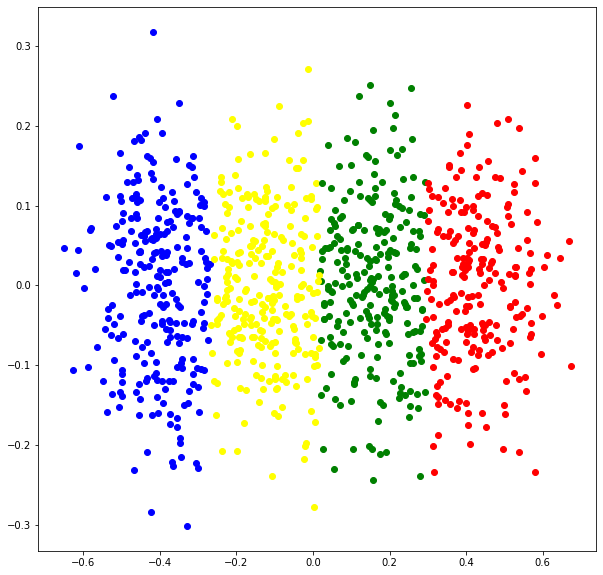

In [52]:
def plotcluster(feat_2d,clusters):
  col_dic={0:'blue',1:'green',2:'yellow',3:'red'}
  colors=[col_dic[x] for x in clusters]
  plt.figure(figsize=(10,10))
  for pt in range(len(clusters)):
    plt.scatter(feat_2d[pt][0], feat_2d[pt][1],color=colors[pt])

plotcluster(feat_2d,clusters)

In [54]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg.fit_predict(feat_2d)
agg_clusters

array([2, 2, 0, 0, 2, 2, 0, 3, 2, 2, 0, 1, 1, 1, 0, 3, 0, 1, 3, 1, 2, 3,
       2, 2, 3, 1, 0, 2, 1, 1, 1, 2, 0, 3, 3, 2, 1, 3, 2, 1, 3, 3, 0, 1,
       0, 2, 2, 0, 0, 3, 2, 1, 0, 0, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 3, 3,
       1, 3, 1, 0, 1, 3, 3, 0, 1, 3, 1, 3, 2, 1, 3, 1, 0, 1, 3, 0, 1, 3,
       1, 1, 1, 1, 0, 3, 1, 1, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 0, 1, 3, 0,
       3, 1, 2, 2, 1, 0, 1, 0, 2, 1, 3, 1, 0, 0, 2, 3, 1, 3, 0, 2, 1, 1,
       1, 3, 1, 1, 3, 2, 3, 1, 2, 1, 1, 2, 0, 0, 1, 0, 3, 1, 0, 2, 2, 3,
       2, 1, 1, 3, 3, 3, 1, 2, 0, 0, 3, 1, 1, 2, 2, 0, 2, 1, 3, 0, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 3, 0, 2, 0, 0, 1, 1, 2, 1, 1, 0, 1, 3, 3,
       2, 0, 1, 0, 0, 0, 2, 2, 0, 3, 0, 1, 0, 0, 1, 2, 0, 1, 3, 0, 2, 0,
       3, 2, 2, 0, 1, 3, 1, 2, 1, 2, 3, 2, 1, 3, 2, 0, 0, 2, 3, 1, 3, 1,
       0, 3, 3, 2, 0, 2, 2, 1, 0, 3, 1, 2, 0, 0, 0, 2, 0, 2, 3, 0, 0, 3,
       2, 3, 1, 1, 1, 3, 0, 2, 3, 1, 1, 1, 0, 1, 3, 2, 0, 0, 1, 2, 2, 0,
       0, 1, 0, 2, 2, 1, 2, 3, 0, 0, 3, 3, 1, 2, 0,

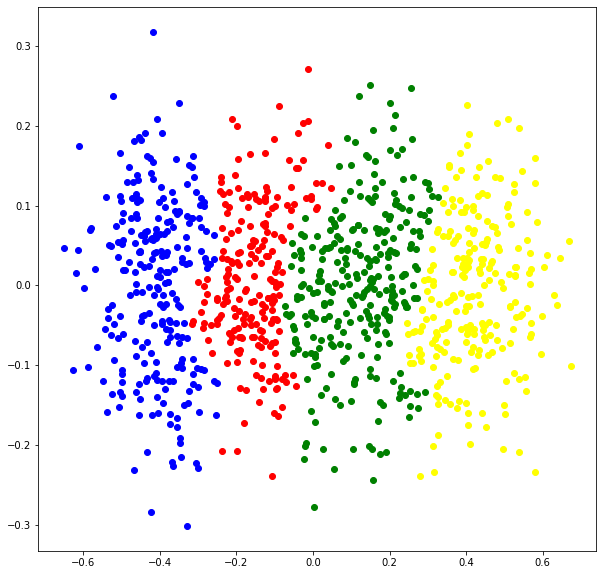

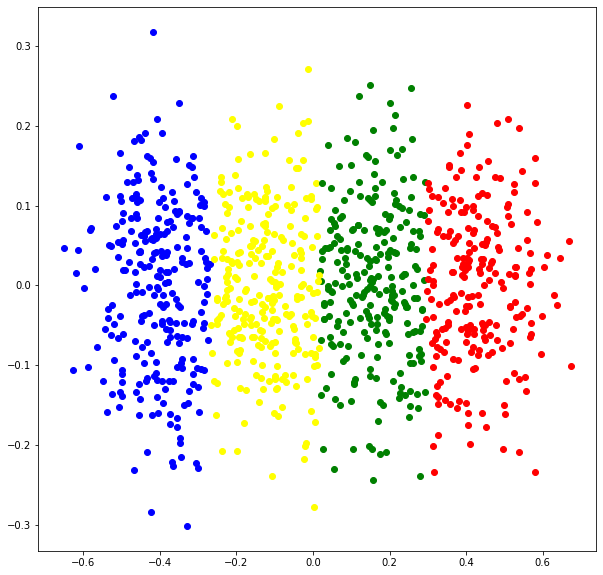

In [56]:
#clusters from agglomerative clustering
plotcluster(feat_2d,agg_clusters)
#clusters from kmeans clustering
plotcluster(feat_2d,clusters)